# Classifying Mushrooms
### Machine Learning Phase II

#### Parvi Verma
#### s3744398
#### Pranav Karambelkar
#### s3715015
#### June 9, 2019

## Objective:
The main objective of this investigation is to solve the binary classfication problem of classifying mushrooms as edible or poisonous. This project consists of two phases: In Phase I, Data Preparation and Data Exploration was covered and Phase II is focused on fitting three Machine Learning Algorithms to solve the Binary Classification problem.

## Source:
Source of the dataset is as follows
1. Parent Source: www.kaggle.com
2. Link: https://www.kaggle.com/uciml/mushroom-classification/version/1
3. The dataset was originally contributed to the UCI Machine Learning repository.
4. Time Period: Donated to UCI ML 27th April 1987
5. Link for UCI: https://archive.ics.uci.edu/ml/datasets/Mushroom

## Dataset:
This dataset is collected from The Audubon Society Field
Guide to North American Mushrooms in 1981 and sourced by UCI Machine Learning Repository. The dataset consists of 8124 observations and 23 features out which 22 are Descriptive features and 1 Target feature with two classes denoted by `e` as `edible mushrooms` and `p` as `poisonous mushrooms`. All the features in this dataset are categorical including the target feature.

## Methodology:
Three Classifiers are used to classify the labels of target feature:

1) K-Nearest Neighbor

2) Decision Tree

3) Gaussian Naive Bayes

The modeling strategy begins by loading the preprocessed data from phase I and gaining insights about the data. Then the dataset was partitioned into set of descriptive features and target feature. In next step, The binary target feature was encoded into 0 for poisonous mushrooms and 1 for edible mushrooms. Further the descriptive features were one-hot-encoded. For ease of analysis, 5000 observations are randomly sampled out and then the data was split on 70-30 split.

Before fitting any classifier on train data,10 most important features were selected with help of RFI feature selection technique. This was done because our data was giving 100% accuracy with 1-nearest neighbor classifier which implies that full set of features was leading to overfitting and hence it was a necessary requirement for this dataset to apply feature selection.

Using the selected features hyperparameter tuning on K-Nearest Neighbors, Decision trees and Gaussian Naive Bayes was done using training data, we conducted a 5-fold cross-validation with 3 repeatitions. Furthermore, we conducted a 5-fold cross-validation on the test data and performed a paired t-test to check for if performance difference was statistically significant. The compare the performance of each classfier on the basis of accuracy, Confusion matrix, precision, F1-score and recall.

## Insights gained from Phase I:
In phase I,Through the preparaion of data it was noted that there were no inconsistencies in the dataset and the featues were renamed, and re-arranged for ease of analysis. Features like `‘veil-type’`, `‘stalk-surface-below-ring’` and `‘stalk-color-below-ring’` were removed on the basis of redundancy and insignificance. Through the exploration of data it was noted that the this is a balanced dataset with almost equal number of observations in both the classes with no specific feature dividing the target feature into two pure homogeneous groups.

## Loading Dataset from Phase I:
As Phase I was done in R, therefore the prepared filed is exported in .csv format and loaded into Jupiter Notebook directory. The dataset contains 8124 observations and 20 features out which 19 are Descriptive Features and 1 Target Feature.

In [2]:
mush.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-color-above-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
0,convex,smooth,brown,yes,pungent,free,close,narrow,black,enlarging,equal,smooth,white,white,one,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,yes,almond,free,close,broad,black,enlarging,club,smooth,white,white,one,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,yes,anise,free,close,broad,brown,enlarging,club,smooth,white,white,one,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,yes,pungent,free,close,narrow,brown,enlarging,equal,smooth,white,white,one,pendant,black,scattered,urban,poisonous
4,convex,smooth,grey,no,none,free,crowded,broad,black,tapering,equal,smooth,white,white,one,evanescent,brown,abundant,grasses,edible


## Partitioning Dataset:
The dataset is partitioned into 'Data' containing all the Descriptive features and 'target' containing the Target Feature.

In [3]:
##Partitioning Dataset 
#Set of Descriptive Features 
Data = mush.drop(columns = 'target')
#Target Feature
target = mush['target']

## Encoding Target Feature:
Before carrying out modeling on the dataset, it is necessary to encode all the categorical features including target feature. 
Using sklearn, the target feature is label-encoded into 0 and 1 where `0` depicting `poisonous mushrooms` and `1` depicting `edible mushrooms`. As function labelEncoder() encodes the data as 0 and 1 in an alphabetical order of labels, therefore replacing `0` with `1` and `1` with `0` in order to correctly label the positive class of our dataset as `1` which is `edible mushrooms` and negative class as `0` which is `poisonous mushrooms`.

In [4]:
## Encoding Target Feature
## 1 = edible, 0 = poisonous 
from sklearn import preprocessing

target = preprocessing.LabelEncoder().fit_transform(target)
np.unique(target, return_counts = True)
## as alphabetically it is edible=0 and poisonous = 1

(array([0, 1]), array([4208, 3916], dtype=int64))

In [5]:
## replacing it with edible = 1 and poisonous = 0
target_encoded = pd.Series(target).replace({1: 0, 0: 1}).values
target_encoded
np.unique(target_encoded, return_counts = True)

(array([0, 1], dtype=int64), array([3916, 4208], dtype=int64))

Now, edible becomes 1 and poisonous becomes 0 after replacing.

## One-Hot-Encoding Nominal Features: 
This type encoding technique does not assume any arithmetic relationship between different classes. As all the features are nominal descriptive features, therefore one-hot Encoding each nominal Decriptive feature.

Creating list of all the columns with nominal values.

In [6]:
## One-Hot-Encoding Descriptive Features 
#Data = pd.DataFrame(data=data)
# getting the list of all the categorical descriptive features
categorical_cols = Data.columns[Data.dtypes==object].tolist()
categorical_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-color-above-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

Using get_dummies() method, One-Hot Encoding all the nominal descriptive features.

In [7]:
Data = pd.get_dummies(Data, columns=['cap-shape'])
Data = pd.get_dummies(Data, columns=['cap-surface'])
Data = pd.get_dummies(Data, columns=['cap-color'])
Data = pd.get_dummies(Data, columns=['bruises'])
Data = pd.get_dummies(Data, columns=['odor'])
Data = pd.get_dummies(Data, columns=['gill-attachment'])
Data = pd.get_dummies(Data, columns=['gill-spacing'])
Data = pd.get_dummies(Data, columns=['gill-size'])
Data = pd.get_dummies(Data, columns=['gill-color'])
Data = pd.get_dummies(Data, columns=['stalk-shape'])
Data = pd.get_dummies(Data, columns=['stalk-root'])
Data = pd.get_dummies(Data, columns=['stalk-surface-above-ring'])
Data = pd.get_dummies(Data, columns=['stalk-color-above-ring'])
Data = pd.get_dummies(Data, columns=['veil-color'])
Data = pd.get_dummies(Data, columns=['ring-number'])
Data = pd.get_dummies(Data, columns=['ring-type'])
Data = pd.get_dummies(Data, columns=['spore-print-color'])
Data = pd.get_dummies(Data, columns=['population'])
Data = pd.get_dummies(Data, columns=['habitat'])

After one-hot encoding, there are 103 descriptive features in the dataset 'Data'.

In [8]:
Data.head(5)

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## Scaling:
As our data does not have any numerical features therefore scaling is not applied here.


## Sampling Observations:
For ease of analysis only 5000 observations are randomly sampled out. 'Data_sample' and 'target_sample' are two sets created after randomly selecting small subset out of entire data.

The function `sample()` in `pandas` is used for randomly selecting 5000 observation. To pick same set of observations in both `Data_sample` and `target_sample` sets, the value for random state is set to be same.

Here both datasets are converted into `pandas` data frame, on which `sample()` function in pandas is applied and using the `values` method, both sets are converted back to `NumPy` array.

In [9]:
Data_sample = pd.DataFrame(Data).sample(n=5000, random_state=8).values
target_sample = pd.DataFrame(target_encoded).sample(n=5000, random_state=8).values
print(type(Data_sample))
print(type(target_sample))
print(Data_sample.shape)
print(target_sample.shape)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(5000L, 103L)
(5000L, 1L)


## Train-Test Split:
The Data_sample and target_sample datasets with 5000 observations are split under 70:30 split ratio, 70% of data is train data and 30% is test data where train data is used to train the model and test data is used by learnt model to correctly predict the labels and evaluate the performance and accuracy.

In [10]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = train_test_split(Data_sample, 
                                                    target_sample, 
                                                    test_size = 0.3,
                                                    random_state=999)

## K-Fold Cross Validation
K-fold Cross Validation is used on entire dataset where entire dataset is divided into K equal-sized partitions and at every iteration a chunk of data is taken as test dataset and rest k-1 chunks are taken as train dataset.
Here 5-fold Cross Validation is applied with help of `RepeatedStratifiedKFold function` imported from sklearn.model_selection which randomly splits the data into 5 equal-sized chunks and repeats for 3 times.
Further this cross validation method is used within cross_val_score() function in sklearn.model_selection to find the the mean cross-validation performance.

In [11]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)

## Performance of KNN with Full Set of Features:
Using 1 nearest neighbor classifier with 5-fold cross validation and 3 repetitions where cross validation is applied with help of cross_val_score() function in sklearn.model_selection. 
The mean performance accuracy with full set of features is found to be 100% which implies that full set of features is leading to overfitting and hence it is a necessary requirement for this dataset to apply feature selection. 

In [12]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
cv_results_full = cross_val_score(estimator=clf,
                             X=Data_sample,
                             y=target_sample, 
                             cv=cv_method, 
                             scoring='accuracy')
cv_results_full
cv_results_full.mean().round(3)

1.0

## Feature Selection: Random Forest Importance
Random Forest Importance is one of the most powerful techniques for feature selection. This technique is selected for this report because RFI(as filter method) works independent of any Machine learning algorithms and selects the most important set of features by considering interaction between all descriptive features and target feature.
Here to look upon 10 most important features, RFI is applied over full dataset. 

Performing Random Forest Importance Feature selection technique using 100 trees.

In [13]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs

## Random Forest
num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data_sample, target_sample)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]
best_features_rfi = Data.columns[fs_indices_rfi].values
best_features_rfi

array(['odor_none', 'odor_foul', 'stalk-surface-above-ring_silky',
       'gill-size_broad', 'gill-size_narrow',
       'spore-print-color_chocolate', 'bruises_no', 'bruises_yes',
       'ring-type_pendant', 'gill-color_buff'], dtype=object)

In [14]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.21210606, 0.07361107, 0.06309581, 0.05159904, 0.04684217,
       0.0383101 , 0.03102275, 0.02717501, 0.02682927, 0.02373116])

Here are the 10 best features selected by RFI with their importance score.

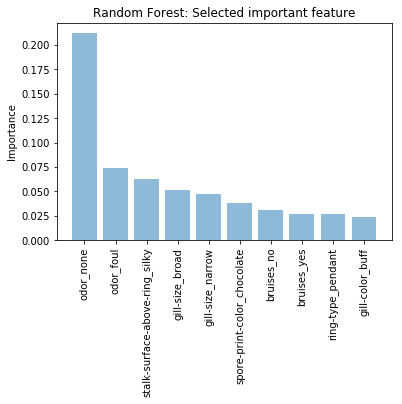

In [15]:
import numpy as np
y_pos = np.arange(len(best_features_rfi))
plt.bar(y_pos,feature_importances_rfi, align='center', alpha=0.5)
plt.xticks(y_pos, best_features_rfi, rotation = 90)
plt.ylabel('Importance')
plt.title('Random Forest: Selected important feature')
plt.show()

## Hyperparameter Tuning
### K Nearest Neighbor (KNN)
In Hyperparameter tuning for KNN, we define a set of parameters and model for grid search.
Parameters for Hyperparameter Tuning of KNN are as follows:
* k : number of nearest neighbors
* p : distance metric

Here values for k is considered from 1 to 7 and values for p as `1(Manhattan), 2(Euclidean) and 5(Minkowski)`. 
Next, these set of parameters and KNeighborsClassifier() as model are passed into GridSearchCV() function with cross validation method discussed above and roc_auc as scoring metric.
Here roc_auc is used as scoring metric because it is robust to imbalanced dataset where negative class dominates positive class.Though our data is balanced but to make the classifier robust against all types of dataset this is used.

In [16]:
## KNN 
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='roc_auc', 
                      return_train_score=True)


Now, fitting grid search KNN on selected set of 10 features by RFI.

In [17]:
## fitting hyperparameter tuning on to selected features
gs_KNN.fit(D_train[:, fs_indices_rfi], t_train);
print("\nBest Parameters for K-Nearest Neighbor") 
print(gs_KNN.best_params_)
print("\nBest Score for K-Nearest Neighbor")
print(gs_KNN.best_score_)
gs_KNN.cv_results_['mean_test_score']
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
print("\n Grid Search Results for  K-Nearest Neighbor")
print(results_KNN)

Fitting 15 folds for each of 21 candidates, totalling 315 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Parameters for K-Nearest Neighbor
{'n_neighbors': 7, 'p': 1}

Best Score for K-Nearest Neighbor
0.9899128601159204

 Grid Search Results for  K-Nearest Neighbor
    n_neighbors  p  test_score     metric
0             1  1    0.965176  Manhattan
1             1  2    0.965176  Euclidean
2             1  5    0.965176  Minkowski
3             2  1    0.977164  Manhattan
4             2  2    0.977164  Euclidean
5             2  5    0.977164  Minkowski
6             3  1    0.981388  Manhattan
7             3  2    0.981388  Euclidean
8             3  5    0.981388  Minkowski
9             4  1    0.988483  Manhattan
10            4  2    0.988483  Euclidean
11            4  5    0.988483  Minkowski
12            5  1    0.989534  Manhattan
13            5  2    0.989534  Euclidean
14            5  5    0.989534  Minkowski
15            6  1    0.989579  Manhattan
16            6  2    0.989579  Euclidean
17            6  5    0.989579  Minkowski
18            7  1    0.989913  Man

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:  1.4min finished


After 5-fold stratified cross validation with 3 repetitions, We observe that the best parameters for KNN are found to be k = 7 and p = 1 (Manhattan distance metric).The mean AUC score with the best parameters is found to be 0.9899.

Plotting the Grid Search Result for each iteration. 


KNN Performance Comparison


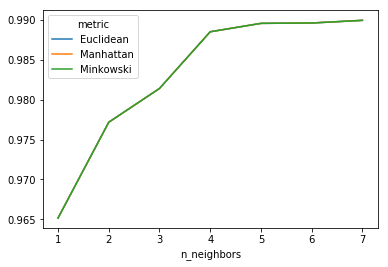

In [18]:
print("\nKNN Performance Comparison")
df_knn = results_KNN.pivot(index='n_neighbors',columns='metric',values='test_score')
df_knn.plot()

The plot confirms that k = 7 with the Manhattan distance metric p = 1 performs the best out of all other combinations. As the values for test-score was same for all three p-values for each k, therefore the plot shows superimposed lines for all three distance metric.

### Decision Tree (DT)
In Hyperparameter tuning for DT, we perform a grid search on parameters. The Parameters for Hyperparameter Tuning of DT are as follows:

criterion : includes criterion such as Gini Index and Entropy

maximum depth: integer metric

min_samples_split : The minimum number of samples needed to split an internal node

Here the criterion are taken as Gini and Entropy. The gini index and Entropy would give us a probability of an object being classified to a particular class, where the least possible value considered as ideal for the root node. The maximum depth can take any integer value as well as none and we have used it up to 8. The min samples split has been used with its default value of 2. Next, these set of parameters are passed into GridSearchCV() function with cross validation method discussed above and roc_auc as scoring metric.
Here roc_auc is used as scoring metric because it is robust to imbalanced dataset where negative class dominates positive class.Though our data is balanced but to make the classifier robust against all types of dataset this is used.

In [19]:
from sklearn.tree import DecisionTreeClassifier
df_classifier = DecisionTreeClassifier(random_state=999)
params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2]}
gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='roc_auc')

Now, fitting grid search DT on selected set of 10 features by RFI.

In [20]:
gs_DT.fit(D_train[:, fs_indices_rfi], t_train);
print("\nBest Parameters for Decision Tree") 
print(gs_DT.best_params_)
print("\nBest Score for Decision Tree")
print(gs_DT.best_score_)
print("\nGrid Search Results for Decision Tree") 
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT

Fitting 15 folds for each of 16 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Parameters for Decision Tree
{'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 6}

Best Score for Decision Tree
0.9947373447460229

Grid Search Results for Decision Tree


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.9s finished


,criterion,max_depth,min_samples_split,test_score
0,gini,1,2,0.889920
1,gini,2,2,0.972829
2,gini,3,2,0.984343
3,gini,4,2,0.993606
4,gini,5,2,0.994101
5,gini,6,2,0.994737
6,gini,7,2,0.994737
7,gini,8,2,0.994737
8,entropy,1,2,0.889920
9,entropy,2,2,0.972829


After 5-fold stratified cross validation with 3 repetitions, We observe that the best parameters for DT are found to be criterion = gini , min_samples_split = 2 and max_depth = 6 .The mean AUC score with the best parameters is found to be 0.9947.

Plotting the Grid Search Result for each iteration. 


DT Performance Comparison


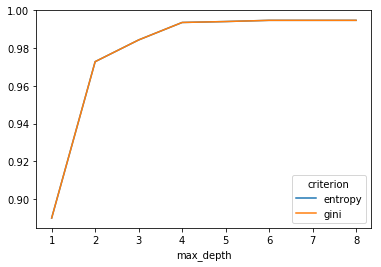

In [21]:
print("\nDT Performance Comparison")
df_dt = results_DT.pivot(index='max_depth',columns='criterion',values='test_score')
df_dt.plot()

The plot confirms that criterion = gini , min_samples_split = 2 and max_depth = 6 performs the best out of all other combinations. As the values for test-score was same for gini index and entropy for each max_depth, therefore the plot shows superimposed lines for gini index and entropy.

###  Gaussian Naive Bayes (NB)
In hyperparameter tuning of NB, we perform grid search on parameter var_smoothing. The parameter for variance smoothing specifies the largest variance in all features to be added to variances for calculating stability.

The Gaussian NB assumes that all the descriptive features are normally distributed. Since, it is highly unlikely in practice, we perform transformation using PowerTransformer, by defining a random variable with a mean of 2 and sample 1000 numbers.
Here roc_auc is used as scoring metric because it is robust to imbalanced dataset where negative class dominates positive class.Though our data is balanced but to make the classifier robust against all types of dataset this is used.

In [22]:
from sklearn.preprocessing import PowerTransformer
np.random.seed(999)
sample_size = 1000
x_exponential = np.random.exponential(2, sample_size).reshape(-1, 1)
x_transformed = PowerTransformer().fit_transform(x_exponential)
df1 = pd.DataFrame(x_exponential)
df1['distribution'] = 'exponential'
df2 = pd.DataFrame(x_transformed)
df2['distribution'] = 'transformed'
# combine the two data frames into one to be used for plotting
df = pd.concat([df1, df2], axis=0)
df.rename(columns={0: 'x'}, inplace=True)
print(df.sample(n=10))
np.logspace(0,-9, num=10)
from sklearn.naive_bayes import GaussianNB
np.random.seed(999)
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='roc_auc')

            x distribution
342 -0.276524  transformed
321  3.216755  exponential
247  1.297923  transformed
514 -1.678249  transformed
343  0.204341  exponential
386  0.486638  exponential
304  0.883091  exponential
772  0.015391  exponential
889  0.184597  transformed
554  0.076667  exponential


Now, fitting grid search NB on selected set of 10 features by RFI.

In [23]:
Data_transformed = PowerTransformer().fit_transform(D_train[:, fs_indices_rfi])
gs_NB.fit(Data_transformed, t_train);
print("\nBest Parameters for Naive Bayes") 
print(gs_NB.best_params_)
print("\nBest Score for Naive Bayes") 
print(gs_NB.best_score_)
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
results_NB.head()

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Parameters for Naive Bayes
{'var_smoothing': 2.310129700083158e-08}

Best Score for Naive Bayes
0.9858735196398886


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   14.1s finished


,var_smoothing,test_score
0,1.000000,0.981212
1,0.811131,0.981737
2,0.657933,0.981769
3,0.533670,0.981948
4,0.432876,0.982159


After 5-fold stratified cross validation with 3 repetitions, We observe that the best parameters for NB is found to be var_smoothing = 2.310129700083158e-08 .The mean AUC score with the best parameters is found to be 0.9858.

## Performance Comparision
The three classifier has been optimized above with help of training dataset and now we optimize these classfiers with help of test data using the cross validation which is itself a random process.Further pairWise t-test is performed in order to understand any difference between the performance of any two optimized classifiers is statistically significant. We first, perform 5-fold stratified cross-validation on each best model (without any repetitions). Second, we conduct a paired t-test for the AUC score between the following model combinations:

* K Nearest-Neighbor vs Naive Bayes
* K Nearest-Neighbor vs Decision Tree
* Decision Tree vs Naive Bayes

In [25]:
cv_method_ttest = RepeatedStratifiedKFold(n_splits=5,  
                                random_state=999)
cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                                 X=D_test[:, fs_indices_rfi],
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean().round(3)

0.99

In [26]:
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                 X=D_test[:, fs_indices_rfi],
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_DT.mean().round(3)

0.994

In [27]:
D_transformed = PowerTransformer().fit_transform(D_test[:, fs_indices_rfi])

cv_results_NB = cross_val_score(estimator=gs_NB.best_estimator_,
                                 X=D_transformed,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_NB.mean().round(3)

0.986

In [28]:
## t-test
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))

Ttest_relResult(statistic=10.199961217916917, pvalue=1.0390609078022574e-13)
Ttest_relResult(statistic=10.717641417229473, pvalue=1.9183115165146602e-14)
Ttest_relResult(statistic=12.069948932284488, pvalue=2.7289532094084873e-16)


All the p-values are less than 0.05 which indicates a statistically significant difference. Looking at these results, we conclude that at a 95% significance level. On the basis of this test DT is statistically the best model out of all other models (in terms of AUC).

## Performance Analysis 
All three classfiers with best parameters have been applied over the train data. Now these learnt classfiers predict the target labels for test data.To compare the performance of these three classifiers, the predicted labels for test data are compared to original labels for test data.

Following Performance Evaluation creterion are used:
* Accuracy
* Confusion Matrix
* F1-Score
* Precision
* Recall

### Accuracy
On the basis of Accuracy it can be said that DT outperforms both KNN and NB.

In [29]:
## KNN 
KNN_pred = gs_KNN.predict(D_test[:, fs_indices_rfi])
from sklearn import metrics
print("\nAccuracy for K-Nearest Neighbor") 
print(metrics.accuracy_score(t_test, KNN_pred))
##DT
DT_pred = gs_DT.predict(D_test[:, fs_indices_rfi])
print("\nAccuracy for Decision Tree") 
print(metrics.accuracy_score(t_test, DT_pred))
##NB
NB_transformed = PowerTransformer().fit_transform(D_test[:, fs_indices_rfi])
NB_pred = gs_NB.predict(NB_transformed)
print("\nAccuracy for Naive Bayes") 
print(metrics.accuracy_score(t_test, NB_pred))


Accuracy for K-Nearest Neighbor
0.9626666666666667

Accuracy for Decision Tree
0.978

Accuracy for Naive Bayes
0.48


### Confusion matrix
* KNN : The Confusion matrix depicts the outcome for test data where 0 is depicted as poisonous mushrooms and 1 as edible mushrooms. The matrix suggests that 664 labels were correctly classified as poisonous mushrooms whereas 56 labels were mislabelled as edible mushrooms. The matrix also suggests that 780 labels were correctly classified as edible mushrooms whereas 0 labels were mislabelled as poisonous mushrooms. 
* DT : The Confusion matrix depicts the outcome for test data where 0 is depicted as poisonous mushrooms and 1 as edible mushrooms. The matrix suggests that 707 labels were correctly classified as poisonous mushrooms whereas 20 labels were mislabelled as edible mushrooms. The matrix also suggests that 760 labels were correctly classified as edible mushrooms whereas 13 labels were mislabelled as poisonous mushrooms. 
* NB : The Confusion matrix depicts the outcome for test data where 0 is depicted as poisonous mushrooms and 1 as edible mushrooms. The matrix suggests that 720 labels were correctly classified as poisonous mushrooms whereas 780 labels were mislabelled as edible mushrooms. The matrix also suggests that 0 labels were correctly classified as edible mushrooms whereas 0 labels were mislabelled as poisonous mushrooms. 

In [30]:
##KNN
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(t_test, KNN_pred))
##DT
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(t_test, DT_pred))
##NB
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(t_test, NB_pred))


Confusion matrix for K-Nearest Neighbor
[[664  56]
 [  0 780]]

Confusion matrix for Decision Tree
[[707  13]
 [ 20 760]]

Confusion matrix for Naive Bayes
[[720   0]
 [780   0]]


### F1-score, precision, recall
* Precision: The percentage of edible mushrooms prediction that are truly edible mushrooms. On the basis of Precision for positive class that is edible(1) it can be said that DT outperforms both KNN and NB . 

* Recall: The percentage of edible mushrooms predictions that were correctly labelled as edible mushrooms. On the basis of Recall for positive class that is edible(1) it can be said that KNN outperforms both DT and NB . 

* F1-Score: It is the harmonic mean of Precision and Recall. On the basis of F1-Score for positive class that is edible(1) it can be said that DT outperforms both KNN and NB.

`From above analysis, we can deduce that DT is the best classifier on basis of F1-score which is weighted average of both precision and recall. As our objective is to minimize mushrooms which were falsely classified as edible but actually are poisonous.`

In [32]:
##KNN
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(t_test, KNN_pred))
##DT
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(t_test, DT_pred))
##NB
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(t_test, NB_pred))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       720
           1       0.93      1.00      0.97       780

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.97      0.96      0.96      1500
weighted avg       0.97      0.96      0.96      1500


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       720
           1       0.98      0.97      0.98       780

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       720
           1       0.00      0.00      0.00       780

   micro avg       0.48      0.48      0.48      1500
  

## Limitations and Proposed Solutions:
* The main limitations in our modeling strategy is that the dataset with full set of features is giving 100% accuracy which is implies overfitting or data leakage. In depth analysis can be done to rectify this problem.

* Feature Selection is done only with help of one technique RFI. Furthermore, other feature selection techniques and depth analysis on feature selection can be done.

* A small subset of dataset was taken in account for ease of analysis but with given set of hardware and equipments, full dataset can be analyised properly.

## Summary:
The Decision Tree Classifier with 10 most important features selected by Random Forest Importance(RFI) produces highest cross-validated AUC score on the training data. The Decision Tree model, when evaluated on the test set, also outperformed both Naive Bayes and K-Nearest Neighbor models with respect to AUC. Moreover, we observed that, the models are highly sensitive to the number of features as full set of features leads to 100% accuracy, which in turn, leads to over fitting. Hence, it is seemingly appropriate that, working with 10 most features results in models that are easier to train and understand. 

## References:
1.  John D. Kelleher, Brian Mac Namee, Aoife D’Arcy : FUNDAMENTALS OF MACHINE LEARNING FOR PREDICTIVE
DATA ANALYTICS- Algorithms, Worked Examples, and Case Studies, 2015. (Sections 1, 4.2.1, 4.2.2)

2. Aurélien Géron : Hands-On Machine Learning with Scikit-Learn and TensorFlow- Concepts, Tools, and Techniques to Build Intelligent Systems, 2017. (Section I.6, I.7)

3. Wes McKinney: Python for Data Analysis - Data Wrangling with Pandas, NumPy, and IPython, 2018. (Section 1.3, 1.4, 2.2.2)

